# Full MARS demo

This is the tutorial from the readme of MARS_Developer in Jupyter notebook form.

## 1. 📁 Create a new MARS Training Project

Your MARS project directory will contain all the files created during the process of training MARS detector and pose models on your data.

In [2]:
from create_new_project import *

location = 'K:/'
name = 'my_project'

create_new_project(location, name,
                   download_MARS_checkpoints=True,
                   download_demo_data=True)

download_MARS_checkpoints hasn't been implemented yet :(
Project my_project created successfully.


<font color=red>**TODO** provide instructions on how to set up the fields of project_config.yaml.

Also TODO: download model checkpoints (inception resnet at the very least, potentially MARS checkpoints as well- maybe make this an optional third argument to create_new_project.)</font>

## 2. ✍️ Collect a set of manually annotated animal poses
In this step, we will get some training data for our detector and pose estimator.

<font color=red>TODO: create a dummy dataset for users to download to try things out- maybe CRIM13?</font>

> If you've already annotated some poses in DeepLabCut, copy the annotation csv to `my_project/annotation_data`, and the images you annotated to `my_project/annotation_data/raw_images`. Set `manifest_name` in `project_config.yaml` to the name of your csv.
>
> Then **skip to step 2.3** to format your data for training.

### 2.1 Extract video frames that you would like to annotate
First, we need to collect a set of video frames to annotate. The script `extract_frames.py` will sample frames from all videos found in a directory, and save those frames as jpg files.

If you've already extracted frames, copy them to `my_project/annotation_data/raw_images` so they can be accessed during model training.

<font color=red>TODO: wrap and test extract_raw_frames.py, and add the neuroethology Util repository to MARS_Developer</font>

In [2]:
# python extract_raw_frames.py input_dir /path/to/videodir project /path/to/savedir/my_project n_frames 500

You should now have a folder `my_project/annotation_data/raw_images` of video frames.

### 2.2 Run a labeling job
Refer to [these instructions](https://github.com/neuroethology/MARS_Developer/blob/develop/pose_annotation_tools/docs/readme_groundTruthSetup.md) to run a labeling job on Amazon SageMaker.

This job will produce a file called `output.manifest` which you should add to `my_project/annotation_data`. If you change the name of this manifest file, be sure to update the `manifest_name` field of `my_project/project_config.yaml` appropriately.

### 2.3 Post-process the manual pose annotations
This script carries out several steps to create "ground truth" keypoint locations by taking the median across AWS workers, correct for left/right flips of body part labels, and package your data for model-training. The processed annotation data will be added as a new file to `annotation_data`.

In [ ]:
frame = np.array([[[0.3296875 , 0.328125  , 0.3234375 , 0.3375    , 0.3328125 ],
        [0.45833333, 0.44375   , 0.44583333, 0.45833333, 0.45416667]],

       [[0.2609375 , 0.2703125 , 0.2671875 , 0.2640625 , 0.271875  ],
        [0.45      , 0.4375    , 0.46458333, 0.44166667, 0.44166667]],

       [[0.296875  , 0.3046875 , 0.303125  , 0.303125  , 0.303125  ],
        [0.37291667, 0.36458333, 0.36041667, 0.36666667, 0.37916667]],

       [[0.271875  , 0.2703125 , 0.275     , 0.26875   , 0.2671875 ],
        [0.40416667, 0.375     , 0.4       , 0.40208333, 0.39583333]],

       [[0.1734375 , 0.234375  , 0.1578125 , 0.171875  , 0.1671875 ],
        [0.45208333, 0.41875   , 0.44791667, 0.45      , 0.44791667]],

       [[0.159375  , 0.2390625 , 0.1609375 , 0.1703125 , 0.165625  ],
        [0.32291667, 0.35      , 0.32708333, 0.32708333, 0.33958333]],

       [[0.10625   , 0.184375  , 0.1015625 , 0.10625   , 0.10625   ],
        [0.41458333, 0.37291667, 0.4125    , 0.4       , 0.41458333]]])

In [ ]:
from pose_annotation_tools.annotation_postprocessing import *

project_path = 'K:\CRIM13_sample_project'
annotation_postprocessing(project_path)

Processing manifest file...
> k:\github\mars_developer\pose_annotation_tools\json_util.py(27)apply_flip_correction()
     25 
     26     pdb.set_trace()
---> 27     for rep in range(3):  # repeat 3 times for stability
     28         for w,worker in enumerate(frame.swapaxes(0,2).swapaxes(1, 2)):
     29             d1 = cdist(worker[[i1, i2], :], [meds[i1, :]])

ipdb> continue
> k:\github\mars_developer\pose_annotation_tools\json_util.py(27)apply_flip_correction()
     25 
     26     pdb.set_trace()
---> 27     for rep in range(3):  # repeat 3 times for stability
     28         for w,worker in enumerate(frame.swapaxes(0,2).swapaxes(1, 2)):
     29             d1 = cdist(worker[[i1, i2], :], [meds[i1, :]])

ipdb> i1
4
ipdb> i2
5
ipdb> pair
['right rear knee', 'left rear knee']
ipdb> meds
array([[0.4046875 , 0.83541667],
       [0.39375   , 0.77708333],
       [0.446875  , 0.81041667],
       [0.4203125 , 0.77916667],
       [0.4328125 , 0.6375    ],
       [0.521875  , 0.70833333],
 

ipdb> continue
> k:\github\mars_developer\pose_annotation_tools\json_util.py(27)apply_flip_correction()
     25 
     26     pdb.set_trace()
---> 27     for rep in range(3):  # repeat 3 times for stability
     28         for w,worker in enumerate(frame.swapaxes(0,2).swapaxes(1, 2)):
     29             d1 = cdist(worker[[i1, i2], :], [meds[i1, :]])

ipdb> frame
array([[[0.9296875 , 0.925     , 0.934375  , 0.925     , 0.925     ],
        [0.525     , 0.51875   , 0.52916667, 0.52708333, 0.52083333]],

       [[0.86875   , 0.8609375 , 0.8609375 , 0.8765625 , 0.8703125 ],
        [0.56041667, 0.47291667, 0.56666667, 0.475     , 0.54791667]],

       [[0.8625    , 0.8546875 , 0.865625  , 0.8578125 , 0.8640625 ],
        [0.475     , 0.55208333, 0.47708333, 0.55      , 0.47291667]],

       [[0.8671875 , 0.8453125 , 0.8546875 , 0.859375  , 0.846875  ],
        [0.51666667, 0.5125    , 0.51458333, 0.49791667, 0.50833333]],

       [[0.815625  , 0.8125    , 0.76875   , 0.8203125 , 0.790625  

### 2.4 Visualize some manual pose annotations

We'll next take a look at the inter-annotator variability in your pose labels, as this is a good predictor for how well MARS will perform. (If you annotated pose yourself you can skip this step.)

<font color=red>TODO: consolidate visualization code and add it here.</font>

NameError: name 'images' is not defined

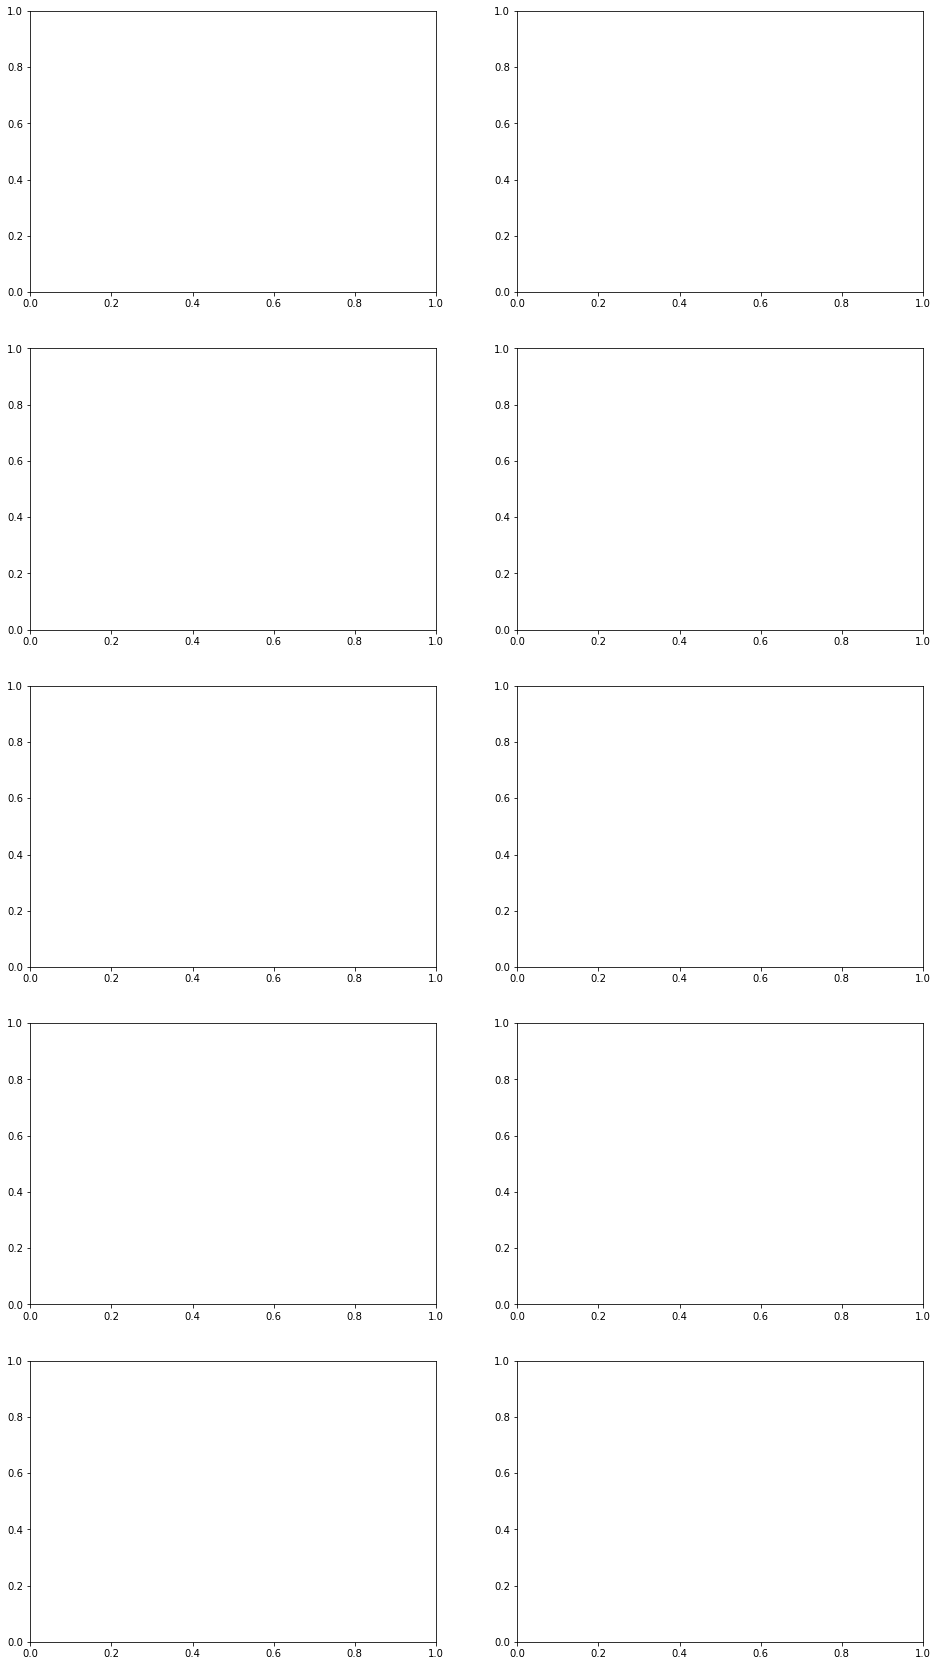

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import json
import numpy as np
import os


project = 'R:\\Basic_Sciences\\Phys\\Kennedylab\\CRIM13_sample_project'

dictionary_file_path = os.path.join(project, 'annotation_data', 'processed_keypoints.json')
if not os.path.exists(dictionary_file_path):
    make_annot_dict(project)
with open(dictionary_file_path, 'r') as fp:
    D = json.load(fp)

colors  = 'rgbcmyw'
markers = 'v+xosd'

fig,ax = plt.subplots(5,2,figsize=(16, 30))
for fr in range(0,10):
    im = mpimg.imread(images[fr])
    ax[int(fr/2),(fr+1)%2].imshow(im);
    
    # plot the labels from each individual worker:
    for mouse,mouseColor in zip(['white','black'],['w','k']):
        for p,pt in enumerate(np.squeeze(allPts[mouse][fr,...])):
            for w in range(nWorkers):
                ax[int(fr/2),(fr+1)%2].plot(pt[0,w], pt[1,w],colors[p] + markers[w], markersize=2,markeredgecolor=mouseColor)

        # plot the "ground truth" labels:
        ax[int(fr/2),(fr+1)%2].plot(gtPts[mouse][fr,:,0], gtPts[mouse][fr,:,1],'k.', markersize=4)

# fig.savefig('s3://{}/sample_annotations.pdf'.format(lbl_bucket), bbox_inches='tight')

## 3. 🎯 Fine-tune the MARS detector to your data

<font color=red>TODO: set NUM_TRAIN_EXAMPLES in the train_config file programmatically! This affects learning rate scheduling, so we should get it right.

Also TODO: clear out some of these warning messages.</font>

### 3.1 Run the training code
`run_training` takes two optional arguments:
* `models` takes names of detectors to train, in case you only want to work on one detector at a time (MARS trains all detectors sequentially by default.)
* `max_training_steps` overrides `NUM_TRAIN_ITERATIONS` in `train_config.yaml` (300,000 by default). You can set this to a small number to confirm everything is working before launching your full training job.

If training is interrupted, it will resume from the most recent model checkpoint; MARS saves checkpoints every 30 minutes (adjust this in `my_project/detection/train_config.yaml`), and when training completes.

In [2]:
from multibox_detection import train

project_path = 'K:\my_project'
train.run_training(project_path, max_training_steps=15)

C:\Users\Ann\Documents\GitHub\MARS_Developer\multibox_detection\train.py:345: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  bbox_priors = np.array(bbox_priors).astype(np.float32)


INFO:tensorflow:Restoring parameters from D:\my_project\detection\black_top_log\model.ckpt-10
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Starting Session.
INFO:tensorflow:Saving checkpoint to path D:\my_project\detection\black_top_log\model.ckpt
INFO:tensorflow:Starting Queues.
INFO:tensorflow:global_step/sec: 0
INFO:tensorflow:Recording summary at step 10.
INFO:tensorflow:global_step/sec: 0.0374452
INFO:tensorflow:Recording summary at step 11.
INFO:tensorflow:global step 11: loss = 548.1651 (37.459 sec/step)
INFO:tensorflow:global step 12: loss = 550.7853 (7.828 sec/step)
INFO:tensorflow:global step 13: loss = 547.7502 (6.653 sec/step)
INFO:tensorflow:global step 14: loss = 427.0122 (6.828 sec/step)
INFO:tensorflow:global_step/sec: 0.0999022
INFO:tensorflow:Recording summary at step 14.
INFO:tensorflow:global step 15: loss = 607.3123 (5.613 sec/step)
INFO:tensorflow:Stopping Training.
INFO:tensorflow:Finished training! Saving mod

C:\Users\Ann\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\summary\writer\writer.py:386: UserWarning: Attempting to use a closed FileWriter. The operation will be a noop unless the FileWriter is explicitly reopened.
  warnings.warn("Attempting to use a closed FileWriter. "
C:\Users\Ann\Documents\GitHub\MARS_Developer\multibox_detection\train.py:345: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  bbox_priors = np.array(bbox_priors).astype(np.float32)


INFO:tensorflow:Restoring parameters from D:\my_project\detection\white_top_log\model.ckpt-10
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Starting Session.
INFO:tensorflow:Saving checkpoint to path D:\my_project\detection\white_top_log\model.ckpt
INFO:tensorflow:Starting Queues.
INFO:tensorflow:global_step/sec: 0
INFO:tensorflow:Recording summary at step 10.
INFO:tensorflow:Recording summary at step 11.
INFO:tensorflow:global step 11: loss = 554.7497 (38.983 sec/step)
INFO:tensorflow:global step 12: loss = 463.0262 (6.502 sec/step)
INFO:tensorflow:global step 13: loss = 585.4284 (7.020 sec/step)
INFO:tensorflow:global step 14: loss = 589.9485 (6.977 sec/step)
INFO:tensorflow:Recording summary at step 14.
INFO:tensorflow:global step 15: loss = 592.4981 (5.703 sec/step)
INFO:tensorflow:Stopping Training.
INFO:tensorflow:Finished training! Saving model to disk.


C:\Users\Ann\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\summary\writer\writer.py:386: UserWarning: Attempting to use a closed FileWriter. The operation will be a noop unless the FileWriter is explicitly reopened.
  warnings.warn("Attempting to use a closed FileWriter. "


### 3.2 Visualize model performance and pick the best checkpoint

During training, we saved a model checkpoint every 30 minutes (by default). We'll visualize the performance of our saved checkpoints on a held-out validation set of images to determine whether performance has plateaued, and use this to pick our best-performing version of the model.

<font color=red>TODO: add early stopping code here?</font>

After picking the checkpoint that performs best on your validation set, we can create some additional performance figures on the test set:

In [ ]:
# add code to generate PR curve figure here


### 3.3 (Optional) test your detector on new videos

💡 If you are working with top-view mouse videos, it is possible that MARS's pose estimator will work for you out of the box now that you have a working detector. Skip to step 5 to try it out! If you're not happy with the performance, continue to step 4 where you'll be able to fine-tune the pose estimator.

## 4. 🐁 Fine-tune the MARS pose estimator to your data


### 4.1 Run the training code
Training the pose estimator is the same as training your detectors.

`run_training` again takes two optional arguments:
* `models` takes names of pose models to train, in case you only want to work on one model at a time (MARS trains all detectors sequentially by default.)
* `max_training_steps` overrides `NUM_TRAIN_ITERATIONS` in `train_config.yaml`. You can set this to a small number to confirm everything is working before launching your full training job.

In [ ]:
from hourglass_pose import train

project_path = 'K:\my_project'
train.run_training(project_path, max_training_steps=15)

### 4.2 Visualize model performance and pick the best checkpoint

As for the detector, we'll visualize the performance of our saved checkpoints to determine whether performance has plateaued and to pick our best-performing version of the pose model.

<font color=red>TODO: add early stopping code here?</font>

## 5. 🚀 Deploy your new detection and pose models

<font color=red>TODO: add process to save protobuf and include instructions for how to add it to MARS</font>

## 6. 💪 Train new behavior classifiers

<font color=red>TODO: add MARS_train_infer to repo!</font>